In [200]:
import math
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


from sklearn.linear_model import SGDClassifier

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, f1_score

In [201]:
# import keras
# keras.__version__

# HPC has 2.4.1


In [202]:
df = pd.read_csv('final_project.csv')

In [203]:
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,6.187465,13.251523,25.665413,-5.017267,10.503714,-2.517678,2.117910,5.865923,-6.666158,1.791497,-1.909114,-1.737940,-2.516715,3.553013,euorpe,-0.801340,1.142950,1.005131,-18.473784,July,tuesday,-3.851669,0.0%,-1.940031,-5.492063,0.627121,-0.873824,$1313.96,-1.353729,-5.186148,-10.612200,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,-11.708859,-2.352809,-25.014934,9.799608,-10.960705,1.504000,-2.397836,-9.301839,-1.999413,5.045258,-5.809984,10.814319,-0.478112,10.590601,asia,0.818792,-0.642987,0.751086,3.749377,Aug,wednesday,1.391594,-0.02%,2.211462,-4.460591,1.035461,0.228270,$1962.78,32.816804,-5.150012,2.147427,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,1.572647,-4.170771,12.078602,-5.158498,7.302780,-2.192431,-4.065428,-7.675055,4.041629,-6.633628,1.700321,-2.419221,2.467521,-5.270615,asia,-0.718315,-0.566757,4.171088,11.522448,July,wednesday,-3.262082,-0.01%,0.419607,-3.804056,-0.763357,-1.612561,$430.47,-0.333199,8.728585,-0.863137,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,-2.000255,-19.286668,10.995330,-5.914378,2.511400,1.292362,-2.496882,-15.722954,-2.735382,1.117536,1.923670,-14.179167,1.470625,-11.484431,asia,-0.052430,-0.558582,9.215569,30.595226,July,wednesday,-2.285241,0.01%,-3.442715,4.420160,1.164532,3.033455,$-2366.29,14.188669,-6.385060,12.084421,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,6.667530,1.965913,-28.106348,-1.258950,5.759941,0.472584,-1.150097,-14.118709,4.527964,-1.284372,-9.026317,-7.039818,-1.978748,-15.998166,asia,-0.223449,0.350781,1.811182,-4.094084,July,tuesday,0.921047,0.01%,-0.431640,12.165494,-0.167726,-0.341604,$-620.66,-12.578926,1.133798,30.004727,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      159974 non-null  float64
 1   x1      159975 non-null  float64
 2   x2      159962 non-null  float64
 3   x3      159963 non-null  float64
 4   x4      159974 non-null  float64
 5   x5      159963 non-null  float64
 6   x6      159974 non-null  float64
 7   x7      159973 non-null  float64
 8   x8      159979 non-null  float64
 9   x9      159970 non-null  float64
 10  x10     159957 non-null  float64
 11  x11     159970 non-null  float64
 12  x12     159964 non-null  float64
 13  x13     159969 non-null  float64
 14  x14     159966 non-null  float64
 15  x15     159965 non-null  float64
 16  x16     159974 non-null  float64
 17  x17     159973 non-null  float64
 18  x18     159960 non-null  float64
 19  x19     159965 non-null  float64
 20  x20     159962 non-null  float64
 21  x21     15

In [205]:
pd.set_option('display.max_columns', None)
df.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x25,x26,x27,x28,x31,x33,x34,x35,x36,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
count,159974.000000,159975.000000,159962.000000,159963.000000,159974.000000,159963.000000,159974.000000,159973.000000,159979.000000,159970.000000,159957.000000,159970.000000,159964.000000,159969.000000,159966.000000,159965.000000,159974.000000,159973.000000,159960.000000,159965.000000,159962.000000,159971.000000,159973.000000,159953.000000,159978.000000,159964.000000,159970.000000,159965.000000,159961.000000,159959.000000,159959.000000,159970.000000,159973.000000,159969.000000,159977.000000,159964.000000,159960.000000,159974.000000,159963.000000,159960.000000,159971.000000,159969.000000,159963.000000,159968.000000,159968.000000,160000.000000
mean,-0.001028,0.001358,-1.150145,-0.024637,-0.000549,0.013582,-1.670670,-7.692795,-0.030540,0.005462,0.002253,0.030232,-1.334402,0.007669,0.008104,0.001215,0.006223,0.012040,0.012694,0.024555,0.299074,-0.029137,0.008400,0.722028,-0.000806,-0.001066,-0.004159,0.031543,-0.005945,-0.006567,-0.000426,0.000936,0.006453,6.059130,0.004253,-2.316526,6.701076,-1.833820,-0.002091,-0.006250,0.000885,-12.755395,0.028622,-0.000224,-0.674224,0.401231
std,0.371137,6.340632,13.273480,8.065032,6.382293,7.670076,19.298665,30.542264,8.901185,6.355040,7.871429,8.769633,14.750990,8.953837,6.964097,3.271779,4.984065,7.569351,4.540714,7.595316,5.806203,9.409635,5.412010,14.909127,1.263656,0.843258,6.774047,14.439534,2.767508,1.747762,8.014180,2.379558,1.593183,16.891603,5.134322,17.043549,18.680196,5.110705,1.534952,4.164595,0.396621,36.608641,4.788157,1.935501,15.036738,0.490149
min,-1.592635,-26.278302,-59.394048,-35.476594,-28.467536,-33.822988,-86.354483,-181.506976,-37.691045,-27.980659,-36.306571,-38.092869,-64.197967,-38.723514,-30.905214,-17.002359,-26.042983,-34.395898,-20.198686,-35.633396,-26.677396,-43.501854,-23.644193,-66.640341,-6.364653,-3.857484,-32.003555,-72.896705,-12.289364,-7.451454,-36.116606,-10.008149,-6.866024,-74.297559,-22.101647,-74.059196,-82.167224,-27.933750,-6.876234,-17.983487,-1.753221,-201.826828,-21.086333,-8.490155,-65.791191,0.000000
25%,-0.251641,-4.260973,-10.166536,-5.454438,-4.313118,-5.148130,-14.780146,-27.324771,-6.031058,-4.260619,-5.288196,-5.903274,-11.379492,-6.029945,-4.696755,-2.207774,-3.344027,-5.071470,-3.056131,-5.101553,-3.607789,-6.361115,-3.649766,-9.268532,-0.852784,-0.567293,-4.597919,-9.702464,-1.874206,-1.183681,-5.401084,-1.610337,-1.068337,-5.249882,-3.458716,-13.953629,-5.804080,-5.162869,-1.039677,-2.812055,-0.266518,-36.428329,-3.216016,-1.320800,-10.931753,0.000000
50%,-0.002047,0.004813,-1.340932,-0.031408,0.000857,0.014118,-1.948594,-6.956789,-0.016840,0.006045,-0.018176,0.010941,-1.624439,-0.003473,0.002467,0.003535,0.012754,0.024541,0.015904,0.044703,0.433055,-0.026385,0.011144,1.029609,-0.003723,-0.001501,0.037138,0.244210,0.002013,-0.006079,-0.013089,-0.002399,0.003645,6.184410,0.019068,-2.701867,6.840110,-1.923754,-0.004385,-0.010484,0.001645,-12.982497,0.035865,-0.011993,-0.574410,0.000000
75%,0.248532,4.284220,7.871676,5.445179,4.306660,5.190749,11.446931,12.217071,5.972349,4.305734,5.331573,5.935032,8.374524,6.041959,4.701299,2.211660,3.366853,5.101962,3.073002,5.164732,4.306566,6.316457,3.672678,11.028035,0.851765,0.567406,4.649773,9.936995,1.856369,1.179460,5.411667,1.603089,1.079895,17.420148,3.463308,8.981616,19.266367,1.453507,1.033275,2.783274,0.269049,11.445443,3.268028,1.317703,9.651072,1.000000
max,1.600849,27.988178,63.545653,38.906025,26.247812,35.550110,92.390605,149.150634,39.049831,27.377842,37.945583,36.360443,73.279354,42.392177,32.546340,13.782559,21.961123,37.057048,19.652986,33.515550,27.814560,46.237503,24.863012,58.490500,5.314169,3.951652,28.645074,67.753845,12.279356,7.787120,34.841428,9.892426,6.999544,90.467981,21.545591,88.824477,100.050432,22.668041,6.680922,19.069759,1.669205,150.859415,20.836854,8.226552,66.877604,1.000000


In [206]:
df.isnull().sum().sum()

1608

In [207]:
colname = list(df.columns)
rank = {}

for i in range(len(colname)):
    count = df[df.columns[i]].isna().sum()
    rank[i] = count
    
    if count > 0:
        print("Column '{col}' has {ct} NAs".format(col = colname[i], ct = count))

Column 'x0' has 26 NAs
Column 'x1' has 25 NAs
Column 'x2' has 38 NAs
Column 'x3' has 37 NAs
Column 'x4' has 26 NAs
Column 'x5' has 37 NAs
Column 'x6' has 26 NAs
Column 'x7' has 27 NAs
Column 'x8' has 21 NAs
Column 'x9' has 30 NAs
Column 'x10' has 43 NAs
Column 'x11' has 30 NAs
Column 'x12' has 36 NAs
Column 'x13' has 31 NAs
Column 'x14' has 34 NAs
Column 'x15' has 35 NAs
Column 'x16' has 26 NAs
Column 'x17' has 27 NAs
Column 'x18' has 40 NAs
Column 'x19' has 35 NAs
Column 'x20' has 38 NAs
Column 'x21' has 29 NAs
Column 'x22' has 27 NAs
Column 'x23' has 47 NAs
Column 'x24' has 28 NAs
Column 'x25' has 22 NAs
Column 'x26' has 36 NAs
Column 'x27' has 30 NAs
Column 'x28' has 35 NAs
Column 'x29' has 30 NAs
Column 'x30' has 30 NAs
Column 'x31' has 39 NAs
Column 'x32' has 31 NAs
Column 'x33' has 41 NAs
Column 'x34' has 41 NAs
Column 'x35' has 30 NAs
Column 'x36' has 27 NAs
Column 'x37' has 23 NAs
Column 'x38' has 31 NAs
Column 'x39' has 23 NAs
Column 'x40' has 36 NAs
Column 'x41' has 40 NAs
Co

In [208]:
column_rank = pd.DataFrame(rank.items(), columns = ['Attr', 'Missing Count'])
column_rank["Missing Percentage"] = round(column_rank["Missing Count"]/len(df)*100,2)
column_rank.sort_values("Missing Count", ascending=False)

,Attr,Missing Count,Missing Percentage
23,23,47,0.03
10,10,43,0.03
34,34,41,0.03
33,33,41,0.03
44,44,40,0.02
18,18,40,0.02
41,41,40,0.02
31,31,39,0.02
20,20,38,0.02
2,2,38,0.02


In [209]:
num_vec = list(range(df.shape[1]))
non_num = [24,29,30,32,37,50]
num_vec = [x for x in num_vec if x not in non_num]

In [210]:
df.iloc[:,num_vec]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x25,x26,x27,x28,x31,x33,x34,x35,x36,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,6.187465,13.251523,25.665413,-5.017267,10.503714,-2.517678,2.117910,5.865923,-6.666158,1.791497,-1.909114,-1.737940,-2.516715,3.553013,-0.801340,1.142950,1.005131,-18.473784,-3.851669,-1.940031,-5.492063,0.627121,-0.873824,-1.353729,-5.186148,-10.612200,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,-11.708859,-2.352809,-25.014934,9.799608,-10.960705,1.504000,-2.397836,-9.301839,-1.999413,5.045258,-5.809984,10.814319,-0.478112,10.590601,0.818792,-0.642987,0.751086,3.749377,1.391594,2.211462,-4.460591,1.035461,0.228270,32.816804,-5.150012,2.147427,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,1.572647,-4.170771,12.078602,-5.158498,7.302780,-2.192431,-4.065428,-7.675055,4.041629,-6.633628,1.700321,-2.419221,2.467521,-5.270615,-0.718315,-0.566757,4.171088,11.522448,-3.262082,0.419607,-3.804056,-0.763357,-1.612561,-0.333199,8.728585,-0.863137,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,-2.000255,-19.286668,10.995330,-5.914378,2.511400,1.292362,-2.496882,-15.722954,-2.735382,1.117536,1.923670,-14.179167,1.470625,-11.484431,-0.052430,-0.558582,9.215569,30.595226,-2.285241,-3.442715,4.420160,1.164532,3.033455,14.188669,-6.385060,12.084421,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,6.667530,1.965913,-28.106348,-1.258950,5.759941,0.472584,-1.150097,-14.118709,4.527964,-1.284372,-9.026317,-7.039818,-1.978748,-15.998166,-0.223449,0.350781,1.811182,-4.094084,0.921047,-0.431640,12.165494,-0.167726,-0.341604,-12.578926,1.133798,30.004727,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159995,-0.487024,-4.270269,0.417395,-1.992423,1.757552,-1.167819,0.606860,41.084463,-1.923188,-2.374213,-0.767600,-12.559985,-17.261030,1.539396,-9.381709,1.902309,3.312219,-5.294374,-2.282197,-0.086858,-1.561650,-6.587422,5.722581,6.204019,0.157849,0.480470,0.365907,28.161584,2.592255,2.308255,-6.255585,-0.316119,-2.356991,-8.491069,2.475853,-5.032652,-9.390451,8.096802,-0.875131,-1.413787,-0.363968,15.339392,4.364205,-3.831489,28.389858
159996,0.825477,4.804368,22.161535,11.371303,1.715901,6.990759,32.221207,-12.278038,-3.861086,6.715126,-6.476405,-8.620521,-23.885703,3.337138,-8.122024,4.028587,-0.034659,6.270644,7.208875,0.328383,1.659820,-16.104552,-4.897545,11.803698,-1.233164,-0.719404,-2.365497,-17.981797,6.987802,1.221009,-7.472690,0.919167,-1.730434,11.576948,-7.420619,-8.472736,12.803189,0.841446,-0.682177,-5.047677,-0.017898,0.780130,6.387266,-1.374742,-1.623952
159997,-0.802489,5.362696,7.243419,-7.496074,2.295250,-2.756067,10.531388,42.515821,1.420984,6.788916,-0.132832,-4.303314,-7.488812,-1.683871,1.601512,-0.208325,3.796216,4.063787,1.326340,-2.845733,-9.689120,-11.673887,0.514821,-8.632121,-0.950303,-0.365088,-6.225611,10.830742,0.809179,0.092094,5.329182,-0.693540,0.163876,-0.313376,-8.381138,22.669070,-0.346570,-0.144098,0.738298,7.241041,0.215347,-12.155249,3.265263,1.230963,3.335471
159998,0.339237,7.609895,5.368414,-2.825481,4.046102,15.322603,7.805271,-10.233054,2.609986,4.251127,-7.484309,12.

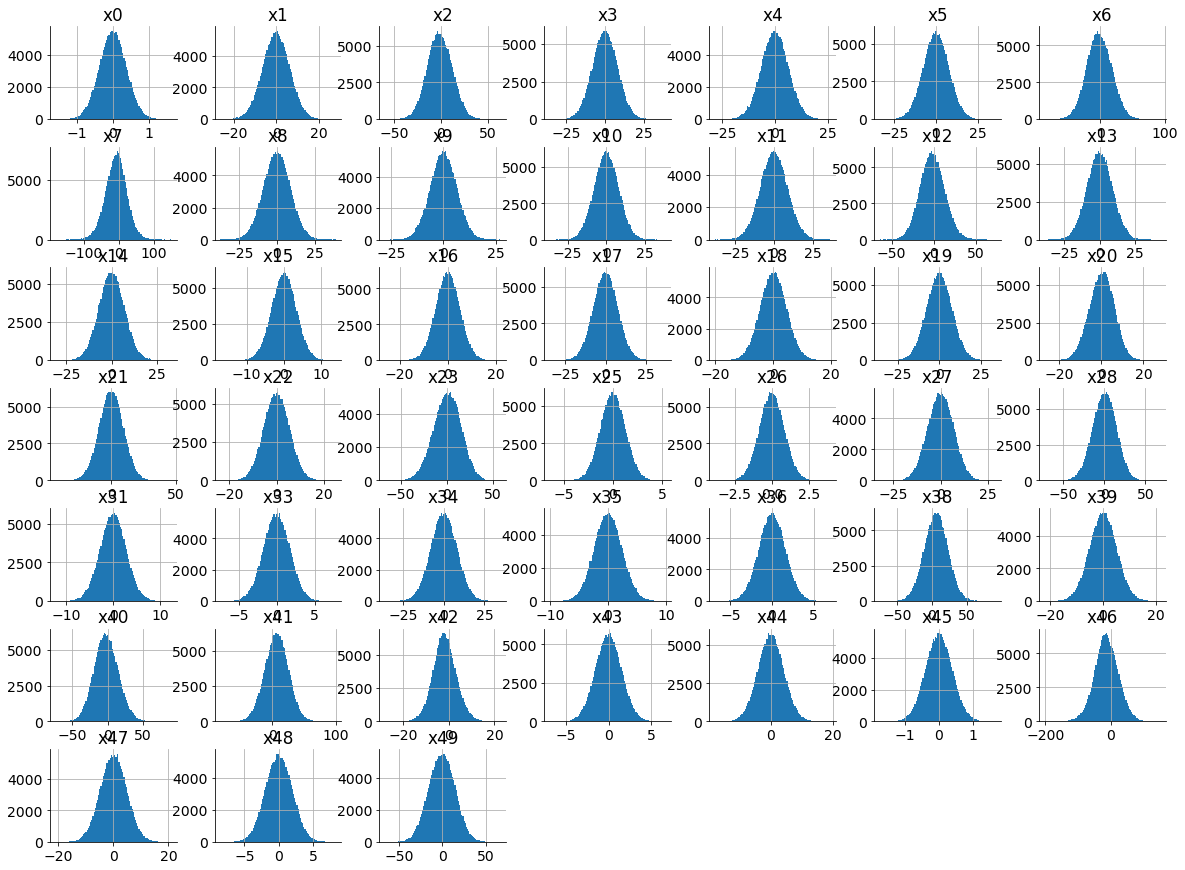

In [211]:
plot_df = df.iloc[:,num_vec]
plot_df.hist(bins=100, figsize = (20,15))
plt.show()

In [212]:
df = df.fillna(df.median())

In [213]:
for i in range(len(colname)):
    count = df[df.columns[i]].isna().sum()
    rank[i] = count
    
    if count > 0:
        print("Column '{col}' has {ct} NAs".format(col = colname[i], ct = count))

Column 'x24' has 28 NAs
Column 'x29' has 30 NAs
Column 'x30' has 30 NAs
Column 'x32' has 31 NAs
Column 'x37' has 23 NAs


In [214]:
df.dropna(axis=0, inplace=True)

In [215]:
df_cleaned = pd.DataFrame.copy(df)
df_cleaned = df_cleaned.reset_index(drop=True)

In [216]:
df_cleaned['y'].value_counts()

0    95722
1    64136
Name: y, dtype: int64

In [217]:
df_cleaned.shape

(159858, 51)

Text(0.5, 1.0, 'Distribution of Target Value')

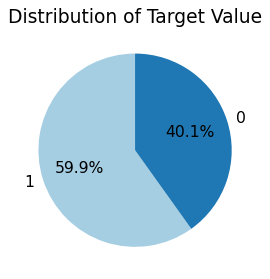

In [218]:
valueCounts = df_cleaned['y'].value_counts()
color = sns.color_palette('Paired')

plt.figure(figsize=(4, 4), dpi=80)
plt.pie(valueCounts, colors = color, autopct='%.01f%%', labels = ['1', '0'], startangle = 90)
plt.title("Distribution of Target Value")

In [219]:
df_cleaned.select_dtypes(include=[object])

,x24,x29,x30,x32,x37
0,euorpe,July,tuesday,0.0%,$1313.96
1,asia,Aug,wednesday,-0.02%,$1962.78
2,asia,July,wednesday,-0.01%,$430.47
3,asia,July,wednesday,0.01%,$-2366.29
4,asia,July,tuesday,0.01%,$-620.66
...,...,...,...,...,...
159853,asia,Aug,wednesday,0.0%,$-891.96
159854,asia,May,wednesday,-0.01%,$1588.65
159855,asia,Jun,wednesday,-0.0%,$687.46
159856,asia,May,wednesday,-0.02%,$439.21


In [220]:
df_cleaned['x37'] = df_cleaned['x37'].map(lambda x: x.lstrip('$')).astype('float')
df_cleaned['x37']

0         1313.96
1         1962.78
2          430.47
3        -2366.29
4         -620.66
           ...   
159853    -891.96
159854    1588.65
159855     687.46
159856     439.21
159857   -1229.34
Name: x37, Length: 159858, dtype: float64

In [221]:
df_cleaned['x32'] = df_cleaned['x32'].map(lambda x: x.rstrip('%')).astype('float')
df_cleaned['x32']

0         0.00
1        -0.02
2        -0.01
3         0.01
4         0.01
          ... 
159853    0.00
159854   -0.01
159855   -0.00
159856   -0.02
159857    0.02
Name: x32, Length: 159858, dtype: float64

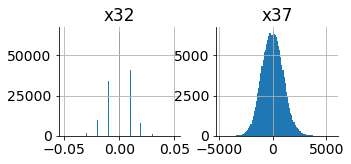

In [222]:
plot_df = df_cleaned.iloc[:,[32,37]]
plot_df.hist(bins=100, figsize = (5,2))
plt.show()

In [223]:
### num_vec is used to process x-data using standard-scaler later

num_vec = df_cleaned.select_dtypes(exclude=[object]).columns.tolist()
to_go = num_vec.index('y')
num_vec.pop(to_go)

'y'

In [224]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['x24', 'x29', 'x30'], prefix=['x24', 'x29', 'x30'])
df_cleaned

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x25,x26,x27,x28,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,y,x24_america,x24_asia,x24_euorpe,x29_Apr,x29_Aug,x29_Dev,x29_Feb,x29_January,x29_July,x29_Jun,x29_Mar,x29_May,x29_Nov,x29_Oct,x29_sept.,x30_friday,x30_monday,x30_thurday,x30_tuesday,x30_wednesday
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,6.187465,13.251523,25.665413,-5.017267,10.503714,-2.517678,2.117910,5.865923,-6.666158,1.791497,-1.909114,-1.737940,-2.516715,3.553013,-0.801340,1.142950,1.005131,-18.473784,-3.851669,0.00,-1.940031,-5.492063,0.627121,-0.873824,1313.96,-1.353729,-5.186148,-10.612200,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,-11.708859,-2.352809,-25.014934,9.799608,-10.960705,1.504000,-2.397836,-9.301839,-1.999413,5.045258,-5.809984,10.814319,-0.478112,10.590601,0.818792,-0.642987,0.751086,3.749377,1.391594,-0.02,2.211462,-4.460591,1.035461,0.228270,1962.78,32.816804,-5.150012,2.147427,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,1.572647,-4.170771,12.078602,-5.158498,7.302780,-2.192431,-4.065428,-7.675055,4.041629,-6.633628,1.700321,-2.419221,2.467521,-5.270615,-0.718315,-0.566757,4.171088,11.522448,-3.262082,-0.01,0.419607,-3.804056,-0.763357,-1.612561,430.47,-0.333199,8.728585,-0.863137,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,-2.000255,-19.286668,10.995330,-5.914378,2.511400,1.292362,-2.496882,-15.722954,-2.735382,1.117536,1.923670,-14.179167,1.470625,-11.484431,-0.052430,-0.558582,9.215569,30.595226,-2.285241,0.01,-3.442715,4.420160,1.164532,3.033455,-2366.29,14.188669,-6.385060,12.084421,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,6.667530,1.965913,-28.106348,-1.258950,5.759941,0.472584,-1.150097,-14.118709,4.527964,-1.284372,-9.026317,-7.039818,-1.978748,-15.998166,-0.223449,0.350781,1.811182,-4.094084,0.921047,0.01,-0.431640,12.165494,-0.167726,-0.341604,-620.66,-12.578926,1.133798,30.004727,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159853,-0.487024,-4.270269,0.417395,-1.992423,1.757552,-1.167819,0.606860,41.084463,-1.923188,-2.374213,-0.767600,-12.559985,-17.261030,1.539396,-9.381709,1.902309,3.312219,-5.294374,-2.282197,-0.086858,-1.561650,-6.587422,5.722581,6.204019,0.157849,0.480470,0.365907,28.161584,2.592255,0.00,2.308255,-6.255585,-0.316119,-2.356991,-891.96,-8.491069,2.475853,-5.032652,-9.390451,8.096802,-0.875131,-1.413787,-0.363968,15.339392,4.364205,-3.831489,28.389858,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
159854,0.825477,4.804368,22.161535,11.371303,1.715901,6.990759,32.221207,-12.278038,-3.861086,6.715126,-6.476405,-8.620521,-23.885703,3.337138,-8.122024,4.028587,-0.034659,6.270644,7.208875,0.328383,1.659820,-16.104552,-4.897545,11.803698,-1.233164,-0.719404,-2.365497,-17.981797,6.987802,-0.01,1.221009,-7.472690,0.919167,-1.730434,1588.65,11.576948,-7.420619,-8.4727

In [225]:
df_cleaned.isnull().sum().sum()

0

Text(0.5, 1.0, 'Corrleation Heatmap')

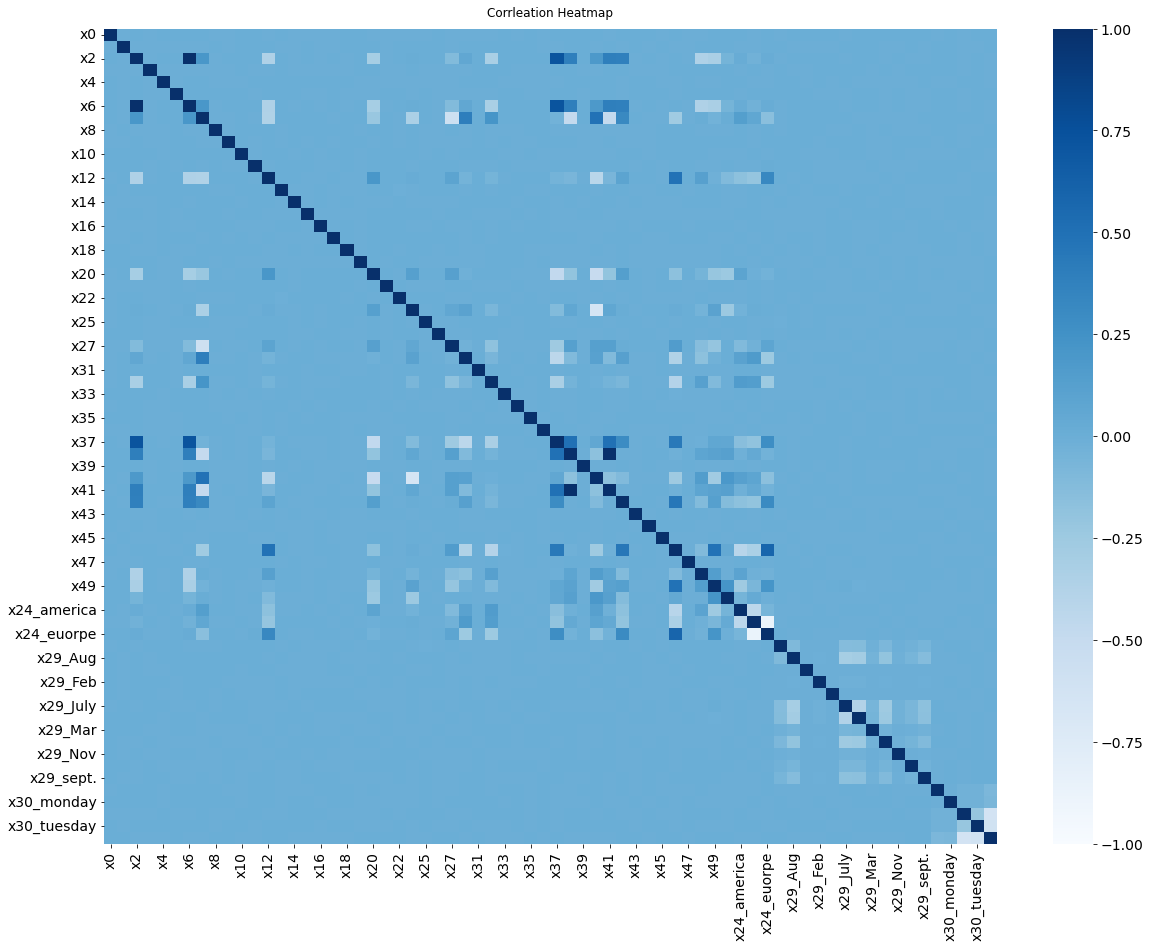

In [226]:
# features 2 and 6 have near-perfect correlation
# features 38 and 41 have near-perfect correlation
plt.figure(figsize=(20,15))

heatmap = sns.heatmap(df_cleaned.corr(), vmin=-1, vmax=1, annot=False, cmap = 'Blues')
heatmap.set_title('Corrleation Heatmap', fontdict={'fontsize':12}, pad=12)

In [227]:
df_cleaned.iloc[:,~df_cleaned.columns.isin(num_vec)]

,y,x24_america,x24_asia,x24_euorpe,x29_Apr,x29_Aug,x29_Dev,x29_Feb,x29_January,x29_July,x29_Jun,x29_Mar,x29_May,x29_Nov,x29_Oct,x29_sept.,x30_friday,x30_monday,x30_thurday,x30_tuesday,x30_wednesday
0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159853,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
159854,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
159855,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
159856,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [228]:
df_cleaned.columns[48:68]

Index(['x24_america', 'x24_asia', 'x24_euorpe', 'x29_Apr', 'x29_Aug',
       'x29_Dev', 'x29_Feb', 'x29_January', 'x29_July', 'x29_Jun', 'x29_Mar',
       'x29_May', 'x29_Nov', 'x29_Oct', 'x29_sept.', 'x30_friday',
       'x30_monday', 'x30_thurday', 'x30_tuesday', 'x30_wednesday'],
      dtype='object')

In [229]:
x_Data = df_cleaned.loc[:,df_cleaned.columns!='y']
y_Data = df_cleaned.loc[:,'y']

In [230]:
df_cleaned.shape

(159858, 68)

In [231]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [232]:
def scale_just_nums(dataframe, vector):
    only_x = dataframe.loc[:,vector]
    scaled_x = pd.DataFrame(scaler.fit_transform(only_x))
    all_x_data = pd.concat([scaled_x.reset_index(drop=True),
                            dataframe.loc[:,~dataframe.columns.isin(vector)].reset_index(drop=True)],
                           axis=1)
    all_x_data = pd.DataFrame(all_x_data)
    
    return all_x_data

In [233]:
# Set up Train/Test Split for Modeling
# 80 - 20 split
x_train_raw, x_test_raw, y_train, y_test = train_test_split(
    x_Data, y_Data, test_size=0.2, stratify=y_Data, random_state=444)

# took the 20% (test) and split into 60/40 = test holdout is 40% of the original test 
x_test1_raw, x_test2_raw, y_test1, y_test2 = train_test_split(
    x_test_raw, y_test, test_size=0.4, stratify=y_test, random_state=109)

# 40% of the test = 8% of the total data 


# train - val - test = hold out test to final end
# train = 
# val = x_test
# test = x_test2 (x_test2_raw is unscaled/non-normalized/non-transformed)

In [234]:
# run the standard scaler on the x_data:  train / test_1 / test_2
x_train = scale_just_nums(x_train_raw, num_vec)

In [235]:
x_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,x24_america,x24_asia,x24_euorpe,x29_Apr,x29_Aug,x29_Dev,x29_Feb,x29_January,x29_July,x29_Jun,x29_Mar,x29_May,x29_Nov,x29_Oct,x29_sept.,x30_friday,x30_monday,x30_thurday,x30_tuesday,x30_wednesday
count,1.278860e+05,1.278860e+05,1.278860e+05,1.278860e+05,1.278860e+05,1.278860e+05,1.278860e+05,1.278860e+05,1.278860e+05,1.278860e+05,1.278860e+05,1.278860e+05,1.278860e+05,1.278860e+05,1.278860e+05,1.278860e+05,1.278860e+05,1.278860e+05,1.278860e+05,1.278860e+05,1.278860e+05,1.278860e+05,1.278860e+05,1.278860e+05,1.278860e+05,1.278860e+05,1.278860e+05,1.278860e+05,1.278860e+05,1.278860e+05,1.278860e+05,1.278860e+05,1.278860e+05,1.278860e+05,1.278860e+05,1.278860e+05,1.278860e+05,1.278860e+05,1.278860e+05,1.278860e+05,1.278860e+05,1.278860e+05,1.278860e+05,1.278860e+05,1.278860e+05,1.278860e+05,1.278860e+05,127886.000000,127886.000000,127886.000000,127886.000000,127886.000000,127886.000000,127886.000000,127886.000000,127886.000000,127886.000000,127886.000000,127886.000000,127886.000000,127886.000000,127886.000000,127886.000000,127886.000000,127886.000000,127886.000000,127886.000000
mean,-3.519419e-17,-1.112558e-17,5.028237e-18,1.157224e-17,1.214043e-17,-4.792539e-18,2.700247e-17,3.633796e-18,-2.332798e-17,4.431829e-17,3.315407e-18,3.413507e-18,8.940053e-18,-4.350311e-17,-2.698554e-17,-1.220424e-17,-6.161588e-19,1.301855e-17,-1.634177e-17,1.591074e-18,5.488919e-18,1.802856e-17,-1.651106e-17,2.110262e-17,3.932130e-17,9.611990e-18,5.955406e-18,-3.254985e-17,2.726486e-17,9.492647e-16,5.058622e-18,3.648077e-17,-5.873150e-18,-2.417235e-17,-6.146395e-19,-6.819200e-17,4.151985e-17,-1.062944e-17,-9.892918e-17,-2.589994e-17,-1.700850e-17,-9.171845e-18,2.984648e-18,-6.515136e-17,-1.913369e-18,9.668592e-17,7.314905e-18,0.027853,0.869016,0.103131,0.041928,0.183945,0.000133,0.000876,0.000047,0.284965,0.257620,0.007710,0.138295,0.002072,0.015224,0.067185,0.003597,0.003097,0.183492,0.175203,0.634612
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,0.164552,0.337384,0.304131,0.200425,0.387441,0.011529,0.029581,0.006849,0.451399,0.437325,0.087468,0.345211,0.045474,0.122445,0.250343,0.059867,0.055560,0.387070,0.380142,0.481541
min,-4.290084e+00,-4.149690e+00,-4.389162e+00,-4.192902e+00,-4.465624e+00,-4.411507e+00,-4.388868e+00,-5.696475e+00,-4.224214e+00,-4.397838e+00,-4.617056e+00,-4.346722e+00,-4.259258e+00,-4.071110e+00,-4.443970e+00,-5.195837e+00,-5.224998e+00,-4.551836e+00,-4.451166e+00,-4.693651e+00,-4.649846e+00,-4.622836e+00,-4.361948e+00,-4.296829e+00,-5.036377e+00,-4.564093e+00,-4.716265e+00,-4.274218e+00,-4.441025e+00,-4.808387e+00,-4.240269e+00,-4.274185e+00,-4.206564e+00,-4.315402e+00,-4.734377e+00,-4.175774e+00,-4.309196e+00,-4.148941e+00,-4.176113e+00,-5.076185e+00,-4.476410e+00,-4.161482e+00,-4.418199e+00,-5.170657e+00,-4.410596e+00,-4.384534e+00,-4.335719e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.744296e-01,-6.709673e-01,-6.804135e-01,-6.722822e-01,-6.768417e-01,-6.730966e-01,-6.804988e-01,-6.426255e-01,-6.745572e-01,-6.706444e-01,-6.729801e-01,-6.750287e-01,-6.824364e-01,-6.745761e-01,-6.749004e-01,-6.744129e-01,-6.720844e-01,-6.715363e-01,-6.758168e-01,-6.756431e-01,-6.722852e-01,-6.731122e-01,-6.759408

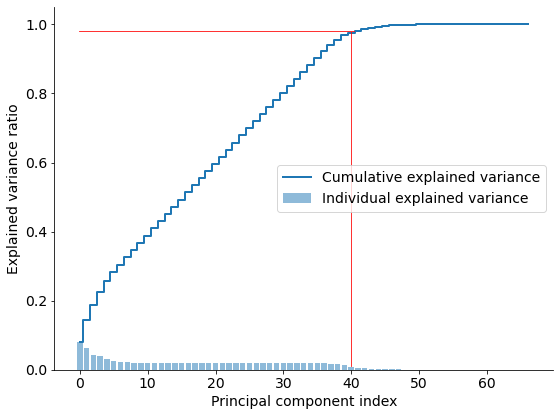

In [236]:
from sklearn.decomposition import PCA
pca = PCA()
x_train_pca = pd.DataFrame(pca.fit_transform(x_train))

exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.figure(figsize=(8,6))
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance', linewidth=2)
plt.axhline(0.98, 0.05, 0.6, color='red', linewidth=0.8)
plt.axvline(40, 0.01, 0.93, color='red', linewidth=0.8)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [237]:
x_train_pca.iloc[:, np.arange(0,40)]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,1.151301,-0.730042,0.351550,0.499456,1.194567,-0.072542,-1.416375,0.945139,-0.355178,0.225676,-0.117354,-1.245828,-0.242064,-0.594361,-1.252891,-0.104056,-1.275554,-0.358354,0.296990,0.026775,0.423264,-0.763997,-0.553433,-1.969403,-1.153568,-0.988202,1.307964,2.267755,0.019215,-0.394420,0.496465,-0.285537,-1.687770,-0.872720,0.156275,-0.933656,-0.061773,-0.199318,-0.883639,0.824123
1,-0.920183,-3.543658,1.792123,-0.081244,0.805011,-0.809920,-1.089493,1.211967,0.171364,1.433732,0.310765,0.946334,0.014931,-1.837452,-0.334120,0.188556,-0.038584,-1.610076,0.882316,-0.314964,-0.027812,2.026958,0.309622,-0.794369,-0.697941,0.376746,-0.850154,-1.084496,0.573161,-0.745283,0.687947,-1.276247,-1.430748,0.185194,-0.297351,-1.402675,0.315685,0.024842,-1.019132,-0.608097
2,-0.020706,-2.217677,-1.307858,-2.791210,-0.292293,1.384473,0.404533,-0.002908,0.503074,-1.959450,-0.419887,0.724403,0.605029,1.868004,0.313957,-0.224488,-0.528496,-0.615172,0.398323,0.130104,-0.395687,0.335530,-0.139142,1.015505,0.396071,0.631250,-0.315186,0.687894,0.007956,-0.598109,0.265646,1.609105,-1.298069,1.154411,0.428995,-1.287928,0.567546,-1.626412,0.792520,-0.580696
3,-0.686639,-1.082887,-1.864527,-0.425758,0.607832,-1.315057,-0.018615,-0.825432,-0.402101,0.727141,-1.097543,-0.751745,-0.122395,-0.372145,-1.626746,-0.025089,-0.349101,0.960140,-0.621749,-1.213267,1.641928,-1.297948,0.141863,-0.295817,1.526051,0.624168,0.835451,1.061500,-1.861760,-0.178656,1.254879,0.581850,-0.382027,1.464968,0.838744,-0.436043,2.239362,-0.391450,-0.610906,0.228758
4,-1.830730,-0.044902,0.977004,-1.322390,0.559142,-2.093523,-0.212410,0.095221,1.740448,0.106422,-0.649790,1.794528,1.310592,-1.854104,-1.451918,0.832394,-1.149581,0.582513,1.241251,-0.901865,1.007768,0.264854,-0.610027,1.035514,-0.859517,-0.200714,0.257881,1.689930,1.111632,-0.368422,0.558658,-0.311898,-1.767905,0.759684,0.265620,-0.226351,-2.556869,-0.266365,0.669558,-0.762709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127881,-0.003734,2.173747,-1.293330,0.082982,-0.686882,-1.365254,0.184408,-0.104381,0.438419,0.241838,0.212564,0.579109,1.996989,-1.127718,-0.883745,0.767771,0.296055,-1.180193,2.409514,-0.189286,-2.391983,-0.825327,-0.902709,0.210122,0.373374,0.845940,-2.441477,-0.534567,-0.505375,-0.304928,-0.508904,-0.273025,-1.980829,-0.138547,1.438440,0.415517,-1.107732,0.005830,-0.523452,0.560433
127882,5.772723,1.779152,2.358430,-0.581326,-0.959089,-2.744189,-1.045141,-1.823254,-0.448866,0.330306,0.654752,0.792973,0.489859,0.364918,-0.280249,0.622857,2.746458,-0.086539,-1.416245,0.730316,0.750182,-0.360019,-0.271025,-0.449000,-0.110889,0.028054,0.835557,-0.324398,-0.260054,0.686936,0.166586,-1.510207,-0.747214,0.129197,0.367389,1.417902,2.317545,0.618633,-1.088159,1.131106
127883,-3.266675,-0.958101,0.638878,-0.411371,-1.385390,-0.188257,-0.265747,-0.136591,-1.303496,1.401341,-1.305838,-0.999974,-1.284078,-0.668080,-0.036079,0.045569,-1.278749,0.553507,1.271258,1.171929,-0.693109,-0.849036,0.591355,1.070842,-1.465470,-0.437196,0.344175,-0.255684,-1.546290,0.623988,-0.014914,-0.207163,-0.694851,-1.252328,0.493135,-0.269599,-0.018866,-0.429636,0.740270,-0.840510
127884,-2.264936,-0.835191,1.928220,0.566925,0.796947,0.380653,-0.121287,0.043746,-2.264016,1.050486,1.354648,-0.259049,0.231518,-0.960920,-2.216557,-0.130082,-0.567740,-0.055360,1.200404,0.637721,-0.827224,-0.294344,-0.341030,-0.262263,1.481092,-0.345590,0.390653,-0.333637,1.073681,0.860775,-1.087664,1.228116,-0.775356,1.099839,-1.323053,-0.877167,0.512834,0.333323,0.157172,0.472099


In [238]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis


#### Generate Test Data for both normal and PCA data

In [239]:
# run the standard scaler on the x_test_raw:  train / test_1 / test_2
x_test = scale_just_nums(x_test_raw, num_vec)

In [240]:
x_test_pca = pd.DataFrame(pca.fit_transform(x_test))

**Generate Test Data SUBSETS**

In [241]:
x_test1 = scale_just_nums(x_test1_raw, num_vec)
x_test2 = scale_just_nums(x_test2_raw, num_vec)

In [242]:
print(x_test1.shape)
print(x_test2.shape)

(19183, 67)
(12789, 67)


# **KATI NN MODEL START HERE**

In [243]:
# generate our data to train NN - need validation set 

## option 1
# x_validate = scale_just_nums(x_test1_raw, num_vec)
# x_test = scale_just_nums(x_test2_raw, num_vec) # DO NOT USE THIS IN TRAINING NEURAL NETWORK - this is our final test set

## option 2
x_train_nn = x_train
x_val_nn = x_test1
x_test_nn = x_test2

y_train_nn = y_train
y_val_nn = y_test1
y_test_nn = y_test2

# x_test_pca = pd.DataFrame(pca.fit_transform(x_test)) # not going to use PCA data just yet

In [244]:
# load some libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow import keras as ks

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from matplotlib import rcParams
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

In [245]:
# data shape - need for our input layer
x_train_nn.shape
# we have 67 dimensions (features), our input layer needs 67

(127886, 67)

In [246]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(67,), activation='tanh'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [247]:
## YES THIS ONE 
# https://stackoverflow.com/questions/54868152/how-to-calculate-true-positive-in-custom-loss-function-in-keras

import keras.backend as K

def f1_custom(y_true, y_pred):
    def recall(y_true, y_pred):
        # Recall metric.
#         Only computes a batch-wise average of recall.
#         Computes the recall, a metric for multi-label classification of
#         how many relevant items are selected.
        
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall
    
    def precision(y_true, y_pred):
#         """Precision metric.
#         Only computes a batch-wise average of precision.
#         Computes the precision, a metric for multi-label classification of
#         how many selected items are relevant.
#         """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    
    # add weights to change balance of F1 score
    # (precision) false positive costs $100
    # (recall) false negative costs $20
    # we want to penalize false positive more than false negative
    # custom_f1 = custom_score(recall_weight=0.17, precision_weight=0.83) 
    precision_weight = 0.83
    recall_weight = 0.17

    precision = precision*precision_weight
    recall = recall*recall_weight
    
    # return 2*((precision*recall)/(precision+recall+K.epsilon()))
    # return 2*((recall_weight*recall)*(precision*precision_weight))/(recall_weight*recall + precision*precision_weight)
    return 2*((precision*recall)/(precision+recall))

# model.compile(loss='binary_crossentropy',
#           optimizer= "adam",
#           metrics=[f1])

In [248]:
# custom F1 v02

import keras.backend as K

def f1_custom_02(y_true, y_pred):
    def recall(y_true, y_pred):
        # Recall metric.
#         Only computes a batch-wise average of recall.
#         Computes the recall, a metric for multi-label classification of
#         how many relevant items are selected.
        
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon()) # the K.epsilon solves for divide by zero error
        # recall = true_positives / (possible_positives)
        return recall
    
    # this is duplication of recall?....... need to tweak
    def precision(y_true, y_pred):
#         """Precision metric.

#         Only computes a batch-wise average of precision.

#         Computes the precision, a metric for multi-label classification of
#         how many selected items are relevant.
#         """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    
    # add weights to change balance of F1 score
    # (precision) false positive costs $100
    # (recall) false negative costs $20
    # we want to penalize false positive more than false negative
    # custom_f1 = custom_score(recall_weight=0.17, precision_weight=0.83) 
    precision_weight = 0.83
    recall_weight = 0.17

    # precision = precision*precision_weight
    # recall = recall*recall_weight
    
    return (recall_weight*recall + precision*precision_weight)
    # return 1 - (recall_weight*recall + precision*precision_weight)

# model.compile(loss='binary_crossentropy',
#           optimizer= "adam",
#           metrics=[f1])

In [249]:
nn_model.compile(optimizer = 'adam',
                loss = 'binary_crossentropy',
                metrics = [f1_custom, f1_custom_02,
                           tf.keras.metrics.BinaryAccuracy(name = 'accuracy'),
                          tf.keras.metrics.Precision(name = 'precision'),
                          tf.keras.metrics.Recall(name = 'recall')
                          ]
                )

In [ ]:
# nn_model.compile(optimizer = 'adam',
#                 loss = 'binary_crossentropy',
#                 metrics = [f1_custom_02,
#                            tf.keras.metrics.BinaryAccuracy(name = 'accuracy'),
#                           tf.keras.metrics.Precision(name = 'precision'),
#                           tf.keras.metrics.Recall(name = 'recall')
#                           ]
#                 )

In [250]:
nn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 100)               6800      
                                                                 
 dense_17 (Dense)            (None, 50)                5050      
                                                                 
 dense_18 (Dense)            (None, 50)                2550      
                                                                 
 dense_19 (Dense)            (None, 1)                 51        
                                                                 
Total params: 14,451
Trainable params: 14,451
Non-trainable params: 0
_________________________________________________________________


In [251]:
stops = EarlyStopping(monitor='val_loss', patience=3, min_delta=1e-5)

model_fit_nn = nn_model.fit(x_train_nn, y_train_nn,
                      validation_data=(x_val_nn, y_val_nn),
                      epochs=1000,
                      batch_size=10000,
                      callbacks=[stops])

Epoch 1/1000
13/13 [==============================] - 5s 166ms/step - loss: 0.6341 - f1_custom: 0.0998 - f1_custom_02: 0.5666 - accuracy: 0.6317 - precision: 0.5707 - recall: 0.3312 - val_loss: 0.5806 - val_f1_custom: 0.1258 - val_f1_custom_02: 0.6524 - val_accuracy: 0.6942 - val_precision: 0.7007 - val_recall: 0.4149
Epoch 2/1000
13/13 [==============================] - 0s 25ms/step - loss: 0.5495 - f1_custom: 0.1565 - f1_custom_02: 0.6687 - accuracy: 0.7190 - precision: 0.6961 - recall: 0.5320 - val_loss: 0.5155 - val_f1_custom: 0.1720 - val_f1_custom_02: 0.6942 - val_accuracy: 0.7415 - val_precision: 0.7151 - val_recall: 0.5911
Epoch 3/1000
13/13 [==============================] - 0s 29ms/step - loss: 0.4871 - f1_custom: 0.1860 - f1_custom_02: 0.7258 - accuracy: 0.7675 - precision: 0.7425 - recall: 0.6436 - val_loss: 0.4549 - val_f1_custom: 0.2027 - val_f1_custom_02: 0.7590 - val_accuracy: 0.7977 - val_precision: 0.7693 - val_recall: 0.7082
Epoch 4/1000
13/13 [======================

In [252]:
pred = (nn_model.predict(x_test2) > 0.5)*1

400/400 [==============================] - 1s 2ms/step


In [253]:
print(len(x_test2))
print(len(pred))
print(len(y_test2))

12789
12789
12789


In [254]:
from sklearn.metrics import classification_report
print(classification_report(y_test2, pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      7658
           1       0.95      0.94      0.95      5131

    accuracy                           0.96     12789
   macro avg       0.96      0.96      0.96     12789
weighted avg       0.96      0.96      0.96     12789



In [255]:
f1_score(y_test2, pred)

0.9483282674772037

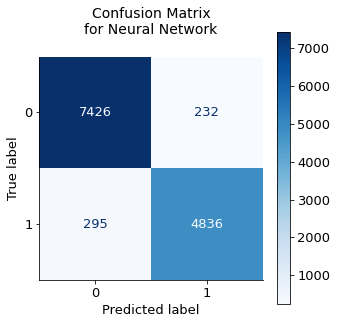

In [256]:
font = {'size'   : 13}
plt.rc('font', **font)

cm = confusion_matrix(y_test2, pred)
c_disp = ConfusionMatrixDisplay(cm, display_labels=np.asarray([0,1]))

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
plt.title('Confusion Matrix\nfor Neural Network\n', fontsize=14)
c_disp.plot(cmap=plt.cm.Blues, ax=ax, values_format='')

In [257]:
from matplotlib import rcParams

rcParams['figure.figsize'] = (10, 5)
rcParams['lines.linewidth'] = 3
rcParams['font.size']=14
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

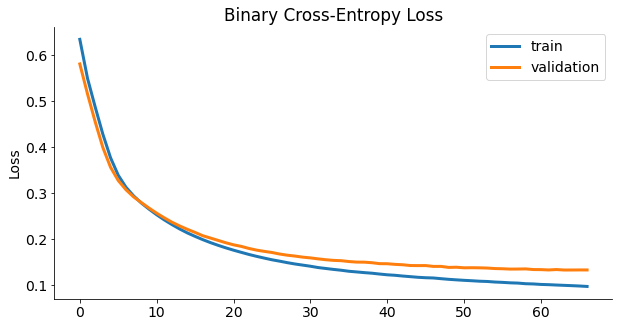

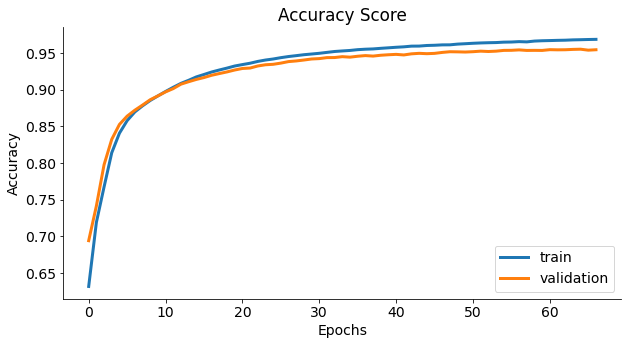

In [258]:
history_df = pd.DataFrame(model_fit_nn.history)
history_df[['loss', 'val_loss']].plot()
plt.title('Binary Cross-Entropy Loss')
plt.ylabel('Loss')
plt.legend(['train','validation'])

history_df = pd.DataFrame(model_fit_nn.history)
history_df[['accuracy', 'val_accuracy']].plot()
plt.title('Accuracy Score')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'], loc='lower right')

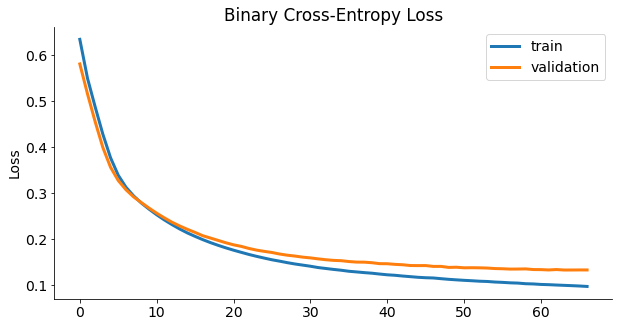

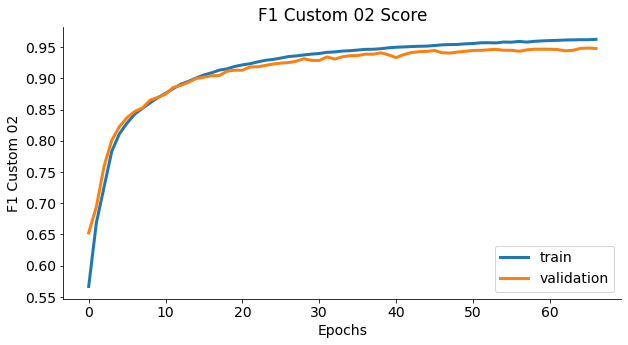

Defaulting to user installation because normal site-packages is not writeable
INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
  Using cached tensorflow-2.11.0-cp39-cp39-win_amd64.whl (1.9 kB)
INFO: pip is looking at multiple versions of <Python from Requires-Python> to determine which version is compatible with other requirements. This could take a while.
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4848 sha256=a8dab02f498e2cd9d3332daa3e38201f33a5fb5e90b21c2b2be8a1880c948262
  Stored in directory: c:\users\kschue200\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
tensorflow-intel 2.11.0 requires absl-py>=1.0.0, but you have absl-py 0.15.0 which is incompatible.
tensorflow-intel 2.11.0 requires flatbuffers>=2.0, but you have flatbuffers 1.12 which is incompatible.
tensorflow-intel 2.11.0 requires keras<2.12,>=2.11.0, but you have keras 2.4.1 which is incompatible.
tensorflow-intel 2.11.0 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
tensorflow-intel 2.11.0 requires tensorflow-estimator<2.12,>=2.

In [259]:
history_df = pd.DataFrame(model_fit_nn.history)
history_df[['loss', 'val_loss']].plot()
plt.title('Binary Cross-Entropy Loss')
plt.ylabel('Loss')
plt.legend(['train','validation'])

history_df = pd.DataFrame(model_fit_nn.history)
history_df[['f1_custom_02', 'val_f1_custom_02']].plot()
plt.title('F1 Custom 02 Score')
plt.ylabel('F1 Custom 02')
plt.xlabel('Epochs')
plt.legend(['train','validation'], loc='lower right')

In [ ]:
# from sklearn.metrics import roc_curve, roc_auc_score
# # # XGBoost
# # fpr, tpr, _ = roc_curve(y_test.ravel(),  xgb_pred_probs[:,1], pos_label='1')
# # auc = roc_auc_score(y_test, xgb_pred_probs[:,1], labels=labels)
# # plt.plot(fpr,tpr,label="XGBoost, AUC="+str(auc))
# # plt.legend(loc=4)

# # # Random Forest
# # fpr, tpr, _ = roc_curve(y_test.ravel(),  pred_probs[:,1], pos_label='1')
# # auc = roc_auc_score(y_test, pred_probs[:,1], labels=labels)
# # plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))
# # plt.legend(loc=4)

# # # Logistic Regression
# # fpr, tpr, _ = roc_curve(y_test.ravel(),  lr_pred_probs[:,1], pos_label='1')
# # auc = roc_auc_score(y_test, lr_pred_probs[:,1], labels=labels)
# # plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))
# # plt.legend(loc=4, fontsize=12)

# # Neural network with custom F1
# nn_pred_probs = nn_model.predict(x_test2)
# fpr, tpr, _ = roc_curve(y_test.ravel(),  nn_pred_probs[:,1], pos_label='1')
# auc = roc_auc_score(y_test, nn_pred_probs[:,1], labels=labels)
# plt.plot(fpr,tpr,label="Neural Network + custom F1, AUC="+str(auc))
# plt.legend(loc=4, fontsize=12)


# # Plot All
# plt.title('ROC curve for Neural Network + custom F1', fontsize=14)
# plt.show()



# # lr_pred_probs = lr_model.predict_proba(x_s_test)

# END KS NN SECTION

#### Setting Up SGD Classifier HYPERS and CV object

In [ ]:
folder = KFold(n_splits=10, shuffle=True, random_state=867)

In [ ]:
sgd_hyps = {'loss':['hinge', 'modified_huber', 'squared_hinge', 'perceptron',
                    'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
            'alpha':np.logspace(-8,8,100),
            'fit_intercept':[True, False],
            'tol':np.logspace(-10,-1,8),
            'epsilon':np.logspace(-4,4,9),
            'learning_rate':['optimal','constant','invscaling','adaptive'],
            'eta0':np.logspace(-3,9,13),
            'power_t':[x + 0.5 for x in np.linspace(-10000,10000,21)],
            'validation_fraction':[0.2],
            'n_iter_no_change':[5],
            'class_weight':[None,'balanced']           
}

In [ ]:
sgdc = SGDClassifier(max_iter=10000, penalty='l2', fit_intercept=True, random_state=487, n_iter_no_change=10, verbose=20)

#### Function for Running Either PCA or Scaled X_train and generating all outputs for SGD

In [ ]:
def sgd_any_inputs(model, hypers, cv_object, train_x, train_y):
    # initial fit
    random_search = RandomizedSearchCV(model, param_distributions=hypers, scoring='f1',
                                      n_iter=200, n_jobs=30, cv=cv_object,
                                      random_state=816, verbose=20)
    random_search.fit(train_x, train_y)
    
    current_best = random_search.best_estimator_
    print(current_best,'\n')
    print('f1 score:\t\t\t',random_search.best_score_)

    # tuned hypers as ranges
    tuned_hypers = {'loss':[current_best.loss],
                    'alpha':[abs(x) for x in np.random.normal(loc=current_best.alpha,
                                                              scale=2*math.exp(math.log(current_best.alpha)),
                                                              size=20).tolist()
                            ],
                    'fit_intercept':[current_best.fit_intercept],
                    'tol':[abs(x) for x in np.random.normal(loc=current_best.tol,
                                                            scale=2*math.exp(math.log(current_best.tol)),
                                                            size=10).tolist()
                          ],
                    'eta0':[current_best.eta0],
                    'epsilon':[current_best.epsilon],
                    'learning_rate':[current_best.learning_rate],
                    'power_t':[current_best.power_t],
                    'validation_fraction':[0.2],
                    'n_iter_no_change':[5],
                    'class_weight':[current_best.class_weight]
                   }
    
    # secondary fit
    grid_search = GridSearchCV(model, param_grid=tuned_hypers, scoring='f1',
                               n_jobs=32, cv=cv_object, verbose=20)
    grid_search.fit(train_x, train_y)
    
    final_best = random_search.best_estimator_
    print(final_best,'\n')
    print('f1 score:\t\t\t',random_search.best_score_)
    
    return final_best

#### SGD with PCA

In [ ]:
sgd_pca_model = sgd_any_inputs(sgdc, sgd_hyps, folder, x_train_pca.iloc[:, np.arange(0,40)], y_train)
sgd_pca_model

In [ ]:
pca_preds = sgd_pca_model.predict(x_test_pca.iloc[:, np.arange(0,40)])
f1_score(y_test, pca_preds)

#### SGD with NO PCA

In [ ]:
gd_search = RandomizedSearchCV(sgdc,
                               param_distributions=sgd_hyps,
                               n_iter=200,
                               n_jobs=30,
                               cv=folder,
                               random_state=725,
                               scoring='f1')
        
gd_search.fit(x_train_pca, y_train)

In [ ]:
best_sgdc = gd_search.best_estimator_
print('f1 score:\t\t\t',gd_search.best_score_)
print('time to fit individual model:\t',gd_search.cv_results_['mean_score_time'].sum().round(2))
print(best_sgdc,'\n')
print(gd_search.cv_results_)

In [ ]:
import math
math.log(best_sgdc.alpha)

In [ ]:
np.random.normal(loc=best_sgdc.alpha,
                 scale=math.exp(math.log(best_sgdc.alpha)),
                 size=6).tolist()

In [ ]:
# Because the 
final_hyps = {'loss':[best_sgdc.loss],
              'alpha':[abs(x) for x in np.random.normal(loc=best_sgdc.alpha,
                                                        scale=2*math.exp(math.log(best_sgdc.alpha)),
                                                        size=20).tolist()
                      ],
              'fit_intercept':[best_sgdc.fit_intercept],
              'tol':[abs(x) for x in np.random.normal(loc=best_sgdc.tol,
                                                      scale=2*math.exp(math.log(best_sgdc.tol)),
                                                      size=10).tolist()
                    ],
              'epsilon':[best_sgdc.epsilon],
              'learning_rate':['optimal'],
              'power_t':[best_sgdc.power_t],
              'validation_fraction':[0.2],
              'n_iter_no_change':[5],
              'class_weight':['balanced']           
}

In [ ]:
big_search = GridSearchCV(sgdc,
                          param_grid=final_hyps,
                          n_jobs=32,
                          cv=10,
                          scoring='f1')
        
big_search.fit(x_train, y_train)

In [ ]:
best_sgdc = big_search.best_estimator_
print('f1 score:\t\t\t',gd_search.best_score_)
print('time to fit individual model:\t',gd_search.cv_results_['mean_score_time'].sum().round(2))
print(best_sgdc,'\n')
print(gd_search.cv_results_)

In [ ]:
import time

begin = time.time()
best_sgdc.fit(x_train, y_train)
sgdc_preds = best_sgdc.predict(x_test)
print('time to train & predict with tuned model',time.time() - begin)

best_sgdc.score(x_test, y_test) #checking internal scoring against 5-fold scoring done during hyperparameter tuning

In [ ]:
cm = confusion_matrix(y_test, sgdc_preds)

font = {'size'   : 13}
plt.rc('font', **font)

c_disp = ConfusionMatrixDisplay(cm, display_labels=np.asarray(['deny','allow']))
fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
plt.title('Confusion Matrix\nfor SGD classifier\n', fontsize=14)
c_disp.plot(cmap=plt.cm.Blues, ax=ax, values_format='')